# Machine Learning Pipeline 

** Build ML model with cross-validation to classify brain injury from EEG.**

* Testing models:

    * Random Forest
    * Linear SVM model
    * Gausian Naive Bayes

* Models with Cross-validation

In [1]:
# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="MBGyCd1hOFVR5EcPbUFAX8MHV",
                        project_name="eeg-trauma", workspace="bfaria-eeg")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/bfaria-eeg/eeg-trauma/b860332cb4ea447d81a9a2aca1538496



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import sensitivity_score, specificity_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_all = pd.read_csv('../mldataset/allfeatures.csv')
data_ml = pd.read_csv('../mldataset/featuresML.csv')
data_pval = pd.read_csv('../mldataset/featuresPVAL.csv')
data_inter = pd.read_csv('../mldataset/featuresINTER.csv')

In [4]:
data_all

,coh_nofilt_fp1_fp2,coh_nofilt_fp1_f7,coh_nofilt_fp1_f3,coh_nofilt_fp1_fz,coh_nofilt_fp1_f4,coh_nofilt_fp1_f8,coh_nofilt_fp1_t3,coh_nofilt_fp1_c3,coh_nofilt_fp1_c4,coh_nofilt_fp1_t4,...,psi_alpha_o2_t3,psi_alpha_o2_c3,psi_alpha_o2_c4,psi_alpha_o2_t4,psi_alpha_o2_t5,psi_alpha_o2_p3,psi_alpha_o2_pz,psi_alpha_o2_p4,psi_alpha_o2_t6,psi_alpha_o2_o1
0,0.849397,0.877339,0.857365,0.864015,0.795604,0.715263,0.611386,0.674974,0.672999,0.609560,...,1.137330,-2.535512,2.851893,-2.413355,-7.886247,-3.430358,-2.940278,4.755336,-2.372887,-6.151342
1,0.682347,0.795053,0.775378,0.657702,0.641092,0.713337,0.647718,0.536908,0.380917,0.541196,...,-0.069698,-0.223584,2.826703,-5.645081,-0.023241,-0.928270,1.025139,2.125412,0.000000,-0.129469
2,0.897231,0.847988,0.861601,0.828406,0.752612,0.744819,0.581250,0.791440,0.517047,0.518814,...,5.719148,4.841813,-4.843460,-2.764540,-1.046704,-2.972760,-6.569496,-2.928576,-0.443500,-0.663475
3,0.755840,0.844175,0.833709,0.886321,0.793390,0.741746,0.808783,0.861057,0.766067,0.809645,...,1.910294,0.064580,1.450907,-1.034041,-0.911907,-1.693191,-1.263543,-3.622760,-2.166221,1.226381
4,0.639640,0.906704,0.887078,0.892046,0.588968,0.631242,0.710337,0.635790,0.448039,0.564691,...,2.343783,-0.019518,-0.481569,1.608233,0.394639,0.247216,0.442689,0.863781,-0.006938,-0.153289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.396877,0.656498,0.576064,0.494556,0.420211,0.428643,0.563125,0.661773,0.500596,0.401992,...,-134.552255,-148.020175,-174.643489,-128.884761,-141.926243,-110.660944,-153.216632,-11.502160,-156.376620,-173.192321
181,0.462236,0.467286,0.384045,0.431943,0.400531,0.356827,0.378937,0.367412,0.380954,0.357517,...,-15.981099,-18.816348,-18.183475,-11.601831,-7.541968,-16.935812,-17.919610,-14.430107,-6.426578,-7.388289
182,0.833737,0.924463,0.834045,0.797401,0.716631,0.788221,0.774200,0.666065,0.550072,0.700391,...,5.923263,7.676919,19.279992,37.209661,3.557597,3.770691,4.755026,0.985402,3.500394,0.911847
183,0.611631,0.875651,0.906435,0.882049,0.470444,0.513214,0.730145,0.792010,0.396715,0.473648,...,-26.785091,51.345199,-32.453846,-37.773608,70.624488,-18.838973,-11.220369,-21.244065,-10.816045,-16.059869


In [5]:
print(data_ml.shape)
data_ml.columns

(185, 31)


Index(['coh_nofilt_fp1_f3', 'coh_nofilt_fp2_pz', 'coh_nofilt_f7_t3',
       'coh_nofilt_t3_c3', 'coh_beta_fp1_f3', 'coh_beta_fp2_o2',
       'coh_beta_f7_t3', 'coh_beta_f8_t4', 'coh_beta_t3_c3', 'coh_beta_t3_t5',
       'coh_theta_f7_o2', 'env_nofilt_f7_c3', 'env_nofilt_t3_c3',
       'env_nofilt_t3_p4', 'env_nofilt_c3_t4', 'env_nofilt_p4_o2',
       'env_alpha_t3_t5', 'env_beta_fp1_f3', 'env_beta_t3_c3',
       'env_beta_t3_c4', 'env_beta_t3_t4', 'env_theta_t3_c4',
       'env_theta_c3_t4', 'bands_beta_f8', 'bands_theta_f8', 'bands_beta_t3',
       'bands_gamma_t3', 'bands_beta_t4', 'psi_alpha_fz_fp1', 'fn', 'target'],
      dtype='object')

In [6]:
print(data_pval.shape)
data_pval.columns

(185, 28)


Index(['coh_nofilt_fp1_c4', 'coh_nofilt_fp2_c3', 'coh_nofilt_f4_f8',
       'coh_nofilt_f8_t4', 'coh_nofilt_t4_p4', 'coh_nofilt_t4_t6',
       'coh_nofilt_t5_p3', 'coh_nofilt_t5_o1', 'coh_nofilt_p4_t6',
       'coh_alpha_fp2_pz', 'coh_alpha_f8_t4', 'coh_alpha_t3_c3',
       'coh_alpha_t3_p4', 'coh_alpha_t5_p3', 'coh_alpha_t5_o1',
       'coh_alpha_pz_p4', 'coh_alpha_pz_o2', 'coh_theta_f3_t3',
       'env_nofilt_fp1_t4', 'env_nofilt_f4_c4', 'env_nofilt_f8_c4',
       'env_nofilt_f8_t4', 'env_beta_fp1_c4', 'env_beta_fp2_t5',
       'bands_gamma_fp1', 'bands_beta_t3', 'psi_alpha_fp2_fp1', 'fn'],
      dtype='object')

In [7]:
print(data_inter.shape)
data_inter.columns

(185, 8)


Index(['coh_nofilt_fp1_f7', 'coh_nofilt_f8_t4', 'env_nofilt_c4_t6',
       'env_nofilt_t4_p4', 'env_beta_fp1_c4', 'bands_beta_t3', 'target', 'fn'],
      dtype='object')

# 1) Classification task using All features

In [14]:
def rfc_grid(X,y):

    grid={'n_estimators':[10, 100, 300, 500], 'max_features': ['auto', 'sqrt', 'log2'],"class_weight":['none','balanced']}

    rdf=RandomForestClassifier(random_state=101)

    rdf_cv=GridSearchCV(rdf,grid,cv=10, n_jobs=-1)
    rdf_cv.fit(X,y)

    print("tuned hpyerparameters :(best parameters) ",rdf_cv.best_params_)
    print("accuracy :",rdf_cv.best_score_)

    for i in range(len(rdf_cv.cv_results_['params'])):
        for k,v in rdf_cv.cv_results_.items():
            if k == "params":
                experiment.log_parameters(v[i])
            else:
                experiment.log_metric(k,v[i])

def svc_grid(X,y):

    grid={'C':[1,10, 100], 'kernel': ['linear','rbf'],"class_weight":['none','balanced']}

    svc=SVC(random_state=101)

    svc_cv=GridSearchCV(svc,grid,cv=10, n_jobs=-1)
    svc_cv.fit(X,y)

    print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
    print("accuracy :",svc_cv.best_score_)

    for i in range(len(svc_cv.cv_results_['params'])):
        for k,v in svc_cv.cv_results_.items():
            if k == "params":
                experiment.log_parameters(v[i])
            else:
                experiment.log_metric(k,v[i])
                
def cal_meth(model, X, X_train, X_test, y_train, y_test, out):
    
    model.fit(X_train, y_train)

    y_pred_trainp = cross_val_predict(model, X_train, y_train, method='predict_proba', cv=10)[:,1] 
    y_predp = cross_val_predict(model, X_test, y_test, method='predict_proba', cv=10)[:,1] 
    y_allp = cross_val_predict(model, X, y, method='predict_proba', cv=10)[:,1]
    roc_train = roc_auc_score(y_train, y_pred_trainp)
    roc_test = roc_auc_score(y_test, y_predp)
    roc_all = roc_auc_score(y, y_allp)
    print('ROC_AUC score train: ', roc_train)
    print('ROC_AUC score test: ', roc_train)
    print('ROC_AUC score all: ', roc_all)
    
    y_pred_train = cross_val_predict(model, X_train, y_train, method='predict', cv=10)
    y_pred = cross_val_predict(model, X_test, y_test, method='predict', cv=10)
    y_pall = cross_val_predict(model, X, y, method='predict', cv=10)
    
    acc_all = accuracy_score(y,y_pall)
    print('accuracy for all: ', acc_all)
    
    sen_train = sensitivity_score(y_train, y_pred_train)
    sen_test = sensitivity_score(y_test, y_pred)
    sen_all = sensitivity_score(y, y_pall)
    spe_train = specificity_score(y_train, y_pred_train)
    spe_test = specificity_score(y_test, y_pred)
    spe_all = specificity_score(y, y_pall)
    print('Sensitivity for train: ', sen_train)
    print('Sensitivity for test: ', sen_test)
    print('Sensitivity for all: ', sen_all)
    print('Specificity for train: ', spe_train)
    print('Specificity for test: ', spe_test)
    print('Specificity for all: ', spe_all)
    conf = confusion_matrix(y_test, y_pred)
    print('Confusion matrix')
    print(confusion_matrix(y_test, y_pred))

    #these will be logged to your sklearn-demos project on Comet.ml
    params={"random_state":101,
            "model_type":out,
            "scaler":"standard scaler"}

    metrics = {"roc_auc_score":roc_train,
    "sensitivity":sen_train,
    "specificity":spe_train
    }

    experiment.log_dataset_hash(X_train)
    experiment.log_parameters(params)
    experiment.log_metrics(metrics)
    experiment.log_confusion_matrix(matrix=conf, title='CM for {} model predictions'.format(out))

def gnb_meth(X, X_train, X_test, y_train, y_test,out):
    
    gnb = GaussianNB().fit(X_train, y_train) 

    y_pred_trainp = cross_val_predict(gnb, X_train, y_train, method='predict_proba', cv=10)[:,1] 
    y_predp = cross_val_predict(gnb, X_test, y_test, method='predict_proba', cv=10)[:,1] 
    y_allp = cross_val_predict(gnb, X, y, method='predict_proba', cv=10)[:,1]
    roc_train = roc_auc_score(y_train, y_pred_trainp)
    roc_test = roc_auc_score(y_test, y_predp)
    roc_all = roc_auc_score(y, y_allp)
    print('ROC_AUC score train: ', roc_train)
    print('ROC_AUC score test: ', roc_train)
    print('ROC_AUC score all: ', roc_all)

    y_pred_train = cross_val_predict(gnb, X_train, y_train, method='predict', cv=10)
    y_pred = cross_val_predict(gnb, X_test, y_test, method='predict', cv=10)
    y_pall = cross_val_predict(gnb, X, y, method='predict', cv=10)
    
    acc_all = accuracy_score(y,y_pall)
    print('accuracy for all: ', acc_all)
    
    sen_train = sensitivity_score(y_train, y_pred_train)
    sen_test = sensitivity_score(y_test, y_pred)
    sen_all = sensitivity_score(y, y_pall)
    spe_train = specificity_score(y_train, y_pred_train)
    spe_test = specificity_score(y_test, y_pred)
    spe_all = specificity_score(y, y_pall)
    print('Sensitivity for train: ', sen_train)
    print('Sensitivity for test: ', sen_test)
    print('Sensitivity for all: ', sen_all)
    print('Specificity for train: ', spe_train)
    print('Specificity for test: ', spe_test)
    print('Specificity for all: ', spe_all)
    conf = confusion_matrix(y_test, y_pred)
    print('Confusion matrix')
    print(confusion_matrix(y_test, y_pred))

    #these will be logged to your sklearn-demos project on Comet.ml
    params={"model_type":"gnb",
            "scaler":"standard scaler"}

    metrics = {"roc_auc_score":roc_train,
    "sensitivity":sen_train,
    "specificity":spe_train
    }

    experiment.log_dataset_hash(X_train_sc)
    experiment.log_metrics(metrics)
    experiment.log_confusion_matrix(matrix=conf, title='CM for {} model predictions'.format(out))

In [9]:
data_all['target'] = data_all['target'].apply(lambda x: 0 if x=='healthy' else 1 if x=='trauma' else None)  
X = data_all.drop(['fn','target'], axis=1)
y = data_all.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_sc = scaler.fit_transform(X)

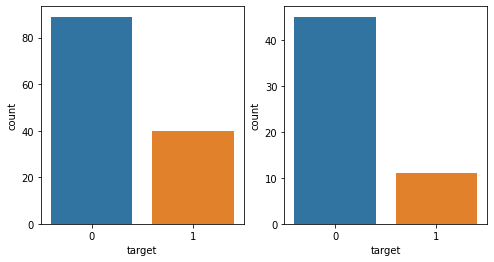

In [11]:
fig, axs = plt.subplots(1,2, figsize=[8,4])
sns.countplot(y_train, ax=axs[0])
sns.countplot(y_test, ax=axs[1])

In [12]:
rfc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 300}
accuracy : 0.8294871794871795


In [15]:
rdf = RandomForestClassifier(max_features='auto', n_estimators=300, class_weight='balanced', random_state=101)
cal_meth(rdf,X_sc,X_train_sc,X_test_sc,y_train,y_test, 'RFC')

ROC_AUC score train:  0.8540730337078654
ROC_AUC score test:  0.8540730337078654
ROC_AUC score all:  0.8214808311384255
accuracy for all:  0.7837837837837838
Sensitivity for train:  0.6
Sensitivity for test:  0.0
Sensitivity for all:  0.49019607843137253
Specificity for train:  0.9325842696629213
Specificity for test:  1.0
Specificity for all:  0.8955223880597015
Confusion matrix
[[45  0]
 [11  0]]


In [16]:
svc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
accuracy : 0.7762820512820513


In [17]:
svc = SVC(C=1, kernel='rbf', class_weight='balanced', random_state=101, probability=True)
cal_meth(svc,X_sc,X_train_sc,X_test_sc,y_train,y_test, 'SVC')

ROC_AUC score train:  0.8460674157303371
ROC_AUC score test:  0.8460674157303371
ROC_AUC score all:  0.8379426397424641
accuracy for all:  0.7945945945945946
Sensitivity for train:  0.75
Sensitivity for test:  0.36363636363636365
Sensitivity for all:  0.7843137254901961
Specificity for train:  0.7865168539325843
Specificity for test:  0.8888888888888888
Specificity for all:  0.7985074626865671
Confusion matrix
[[40  5]
 [ 7  4]]


In [19]:
gnb_meth(X_sc, X_train_sc, X_test_sc, y_train, y_test, 'GNB')

ROC_AUC score train:  0.800561797752809
ROC_AUC score test:  0.800561797752809
ROC_AUC score all:  0.6145741878841088
accuracy for all:  0.5027027027027027
Sensitivity for train:  0.85
Sensitivity for test:  0.7272727272727273
Sensitivity for all:  0.8431372549019608
Specificity for train:  0.7528089887640449
Specificity for test:  0.6444444444444445
Specificity for all:  0.373134328358209
Confusion matrix
[[29 16]
 [ 3  8]]


# 2) Classification task using Features from RFE

In [20]:
data_ml['target'] = data_ml['target'].apply(lambda x: 0 if x=='healthy' else 1 if x=='trauma' else None)  
X = data_ml.drop(['fn','target'], axis=1)
y = data_ml.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_sc = scaler.fit_transform(X)

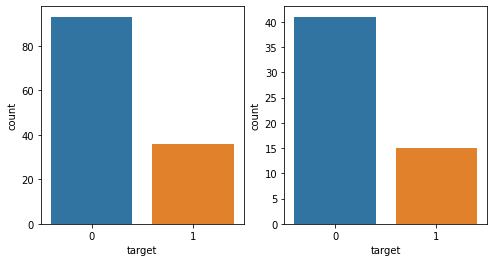

In [22]:
fig, axs = plt.subplots(1,2, figsize=[8,4])
sns.countplot(y_train, ax=axs[0])
sns.countplot(y_test, ax=axs[1])

In [23]:
rfc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 300}
accuracy : 0.8615384615384617


In [24]:
rdf = RandomForestClassifier(max_features='auto', n_estimators=300, class_weight='balanced', random_state=101)
cal_meth(rdf,X_sc,X_train_sc,X_test_sc,y_train,y_test, 'RFC_ml')

ROC_AUC score train:  0.8956093189964157
ROC_AUC score test:  0.8956093189964157
ROC_AUC score all:  0.8957418788410886
accuracy for all:  0.8486486486486486
Sensitivity for train:  0.6111111111111112
Sensitivity for test:  0.8
Sensitivity for all:  0.6666666666666666
Specificity for train:  0.956989247311828
Specificity for test:  0.9512195121951219
Specificity for all:  0.917910447761194
Confusion matrix
[[39  2]
 [ 3 12]]


In [25]:
svc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'C': 100, 'class_weight': 'balanced', 'kernel': 'rbf'}
accuracy : 0.8448717948717949


In [26]:
svc = SVC(C=100, kernel='rbf', class_weight='balanced', random_state=101, probability=True)
cal_meth(svc,X_sc,X_train_sc,X_test_sc,y_train,y_test, 'SVC_ml')

ROC_AUC score train:  0.8163082437275985
ROC_AUC score test:  0.8163082437275985
ROC_AUC score all:  0.7878255779923911
accuracy for all:  0.772972972972973
Sensitivity for train:  0.6111111111111112
Sensitivity for test:  0.6666666666666666
Sensitivity for all:  0.5882352941176471
Specificity for train:  0.9354838709677419
Specificity for test:  0.8536585365853658
Specificity for all:  0.8432835820895522
Confusion matrix
[[35  6]
 [ 5 10]]


In [27]:
gnb_meth(X_sc, X_train_sc, X_test_sc, y_train, y_test, 'GNB_ml')

ROC_AUC score train:  0.7656810035842294
ROC_AUC score test:  0.7656810035842294
ROC_AUC score all:  0.8331870061457419
accuracy for all:  0.7945945945945946
Sensitivity for train:  0.5555555555555556
Sensitivity for test:  0.8
Sensitivity for all:  0.7254901960784313
Specificity for train:  0.8279569892473119
Specificity for test:  0.8780487804878049
Specificity for all:  0.8208955223880597
Confusion matrix
[[36  5]
 [ 3 12]]


# 3) Classification task using Features from pval

In [28]:
data_pval['target'] = data_all['target']
data_pval['target'].apply(lambda x: 0 if x=='healthy' else 1 if x=='trauma' else None)  
X = data_pval.drop(['fn','target'], axis=1)
y = data_pval.target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_sc = scaler.fit_transform(X)

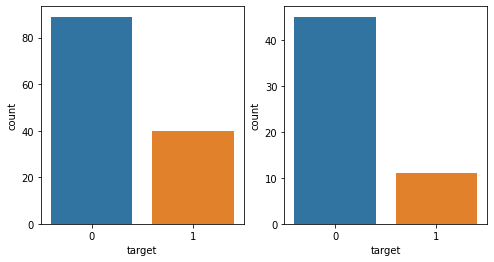

In [30]:
fig, axs = plt.subplots(1,2, figsize=[8,4])
sns.countplot(y_train, ax=axs[0])
sns.countplot(y_test, ax=axs[1])

In [31]:
rfc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 300}
accuracy : 0.7679487179487179


In [32]:
rdf = RandomForestClassifier(max_features='auto', n_estimators=300, class_weight='balanced', random_state=101)
cal_meth(rdf,X_sc,X_train_sc,X_test_sc,y_train,y_test, 'RFC_pval')

ROC_AUC score train:  0.8448033707865168
ROC_AUC score test:  0.8448033707865168
ROC_AUC score all:  0.8191395961369622
accuracy for all:  0.7891891891891892
Sensitivity for train:  0.45
Sensitivity for test:  0.2727272727272727
Sensitivity for all:  0.4117647058823529
Specificity for train:  0.9101123595505618
Specificity for test:  1.0
Specificity for all:  0.9328358208955224
Confusion matrix
[[45  0]
 [ 8  3]]


In [33]:
svc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
accuracy : 0.8294871794871794


In [34]:
svc = SVC(C=1, kernel='linear', class_weight='balanced', random_state=101, probability=True)
cal_meth(svc,X_sc,X_train_sc,X_test_sc,y_train,y_test, 'SVC_pval')

ROC_AUC score train:  0.8949438202247192
ROC_AUC score test:  0.8949438202247192
ROC_AUC score all:  0.8700614574187883
accuracy for all:  0.8108108108108109
Sensitivity for train:  0.825
Sensitivity for test:  0.7272727272727273
Sensitivity for all:  0.7843137254901961
Specificity for train:  0.8314606741573034
Specificity for test:  0.9111111111111111
Specificity for all:  0.8208955223880597
Confusion matrix
[[41  4]
 [ 3  8]]


In [35]:
gnb_meth(X_sc, X_train_sc, X_test_sc, y_train, y_test, 'GBN_pval')

ROC_AUC score train:  0.7289325842696629
ROC_AUC score test:  0.7289325842696629
ROC_AUC score all:  0.7358062628036289
accuracy for all:  0.7189189189189189
Sensitivity for train:  0.7
Sensitivity for test:  0.7272727272727273
Sensitivity for all:  0.6274509803921569
Specificity for train:  0.6741573033707865
Specificity for test:  0.9111111111111111
Specificity for all:  0.753731343283582
Confusion matrix
[[41  4]
 [ 3  8]]


# 4) Classification task using Features from intersection

In [36]:
data_inter['target'] = data_all['target']
data_inter['target'].apply(lambda x: 0 if x=='healthy' else 1 if x=='trauma' else None)  
X = data_inter.drop(['fn','target'], axis=1)
y = data_inter.target

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_sc = scaler.fit_transform(X)

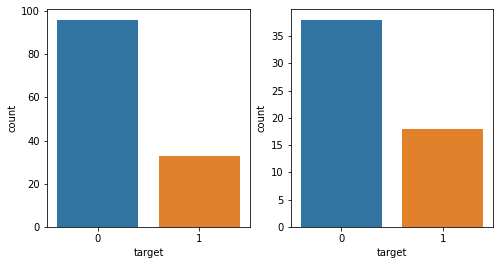

In [38]:
fig, axs = plt.subplots(1,2, figsize=[8,4])
sns.countplot(y_train, ax=axs[0])
sns.countplot(y_test, ax=axs[1])

In [39]:
rfc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 10}
accuracy : 0.860897435897436


In [40]:
rdf = RandomForestClassifier(max_features='auto', n_estimators=10, class_weight='balanced', random_state=101)
cal_meth(rdf,X_sc,X_train_sc,X_test_sc,y_train,y_test, 'RFC_inter')

ROC_AUC score train:  0.8879419191919191
ROC_AUC score test:  0.8879419191919191
ROC_AUC score all:  0.7778753292361722
accuracy for all:  0.8162162162162162
Sensitivity for train:  0.6363636363636364
Sensitivity for test:  0.3888888888888889
Sensitivity for all:  0.5490196078431373
Specificity for train:  0.9375
Specificity for test:  0.8947368421052632
Specificity for all:  0.917910447761194
Confusion matrix
[[34  4]
 [11  7]]


In [41]:
svc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}
accuracy : 0.8378205128205127


In [42]:
svc = SVC(C=10, kernel='rbf', class_weight='balanced', random_state=101, probability=True)
cal_meth(svc,X_sc,X_train_sc,X_test_sc,y_train,y_test, 'SVC_inter')

ROC_AUC score train:  0.8260732323232324
ROC_AUC score test:  0.8260732323232324
ROC_AUC score all:  0.7322212467076383
accuracy for all:  0.7405405405405405
Sensitivity for train:  0.696969696969697
Sensitivity for test:  0.5555555555555556
Sensitivity for all:  0.6274509803921569
Specificity for train:  0.8854166666666666
Specificity for test:  0.7368421052631579
Specificity for all:  0.7835820895522388
Confusion matrix
[[28 10]
 [ 8 10]]


In [43]:
gnb_meth(X_sc, X_train_sc, X_test_sc, y_train, y_test, 'GBN_inter')

ROC_AUC score train:  0.793560606060606
ROC_AUC score test:  0.793560606060606
ROC_AUC score all:  0.7863623061164764
accuracy for all:  0.8108108108108109
Sensitivity for train:  0.5454545454545454
Sensitivity for test:  0.7222222222222222
Sensitivity for all:  0.6078431372549019
Specificity for train:  0.8645833333333334
Specificity for test:  0.8157894736842105
Specificity for all:  0.8880597014925373
Confusion matrix
[[31  7]
 [ 5 13]]


# Conclusions:

![title](../images/Results.png)